# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import os
import warnings


In [2]:
#suppress all warning
warnings.filterwarnings("ignore")

# Loading Data Set

In [3]:
#using locally stored dataset
df=pd.read_csv('data/RTA Dataset.csv')

In [4]:
#load the data from the github repo
# df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [5]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Exploratory Data Analysis

### <i>Initial Exploration</i>

In [6]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8086,10:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Getting off,Passenger,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
6735,20:40:00,Saturday,Under 18,Male,Above high school,Owner,1-2yr,Stationwagen,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
6236,0:45:00,Thursday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),NaN,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1056,7:50:00,Friday,31-50,Male,High school,Employee,Below 1yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,No priority to pedestrian,Serious Injury
5754,20:10:00,Sunday,Under 18,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Unknown,...,Overtaking,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
4423,12:41:00,Tuesday,Unknown,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,NaN,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
2306,23:50:00,Wednesday,18-30,Male,High school,Employee,Below 1yr,Automobile,Owner,NaN,...,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
636,21:15:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Above 10yr,...,Turnover,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the left,Fatal injury
11955,22:25:00,Thursday,31-50,Male,Above high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Crossing from driver's nearside,Driving carelessly,Slight Injury
8427,7:28:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,NaN,...,Turnover,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury


In [9]:
df.shape

(12316, 32)

In [10]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### Rename Columns- use small letters for column names

In [11]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [12]:
df.rename(columns=col_map,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [14]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [15]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<b>Missing Values</b>

In [16]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0]

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
dtype: int64

In [17]:
#missing values in numerical data
df.select_dtypes(exclude=['O']).isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

In [18]:
#Missing values in percentage
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]

vehicle_defect             35.945112
service_year               31.893472
casualty_work              25.966223
casualty_fitness           21.394933
vehicle_type                7.713543
junction_type               7.202014
driving_experience          6.731082
educational_level           6.016564
vehicle_driver_relation     4.701202
vehicle_owner               3.913608
lanes                       3.126015
vehicle_movement            2.500812
accident_area               1.940565
surface_type                1.396557
collision_type              1.258525
road_allignment             1.152972
dtype: float64

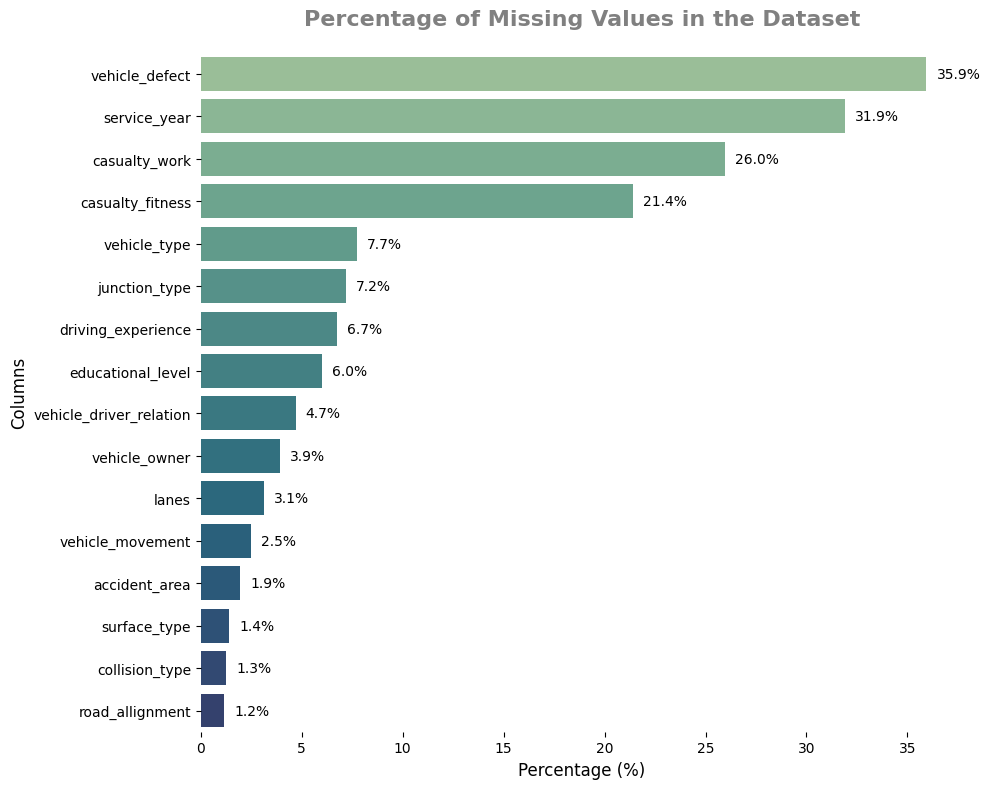

In [19]:
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<b>Missingness</b>

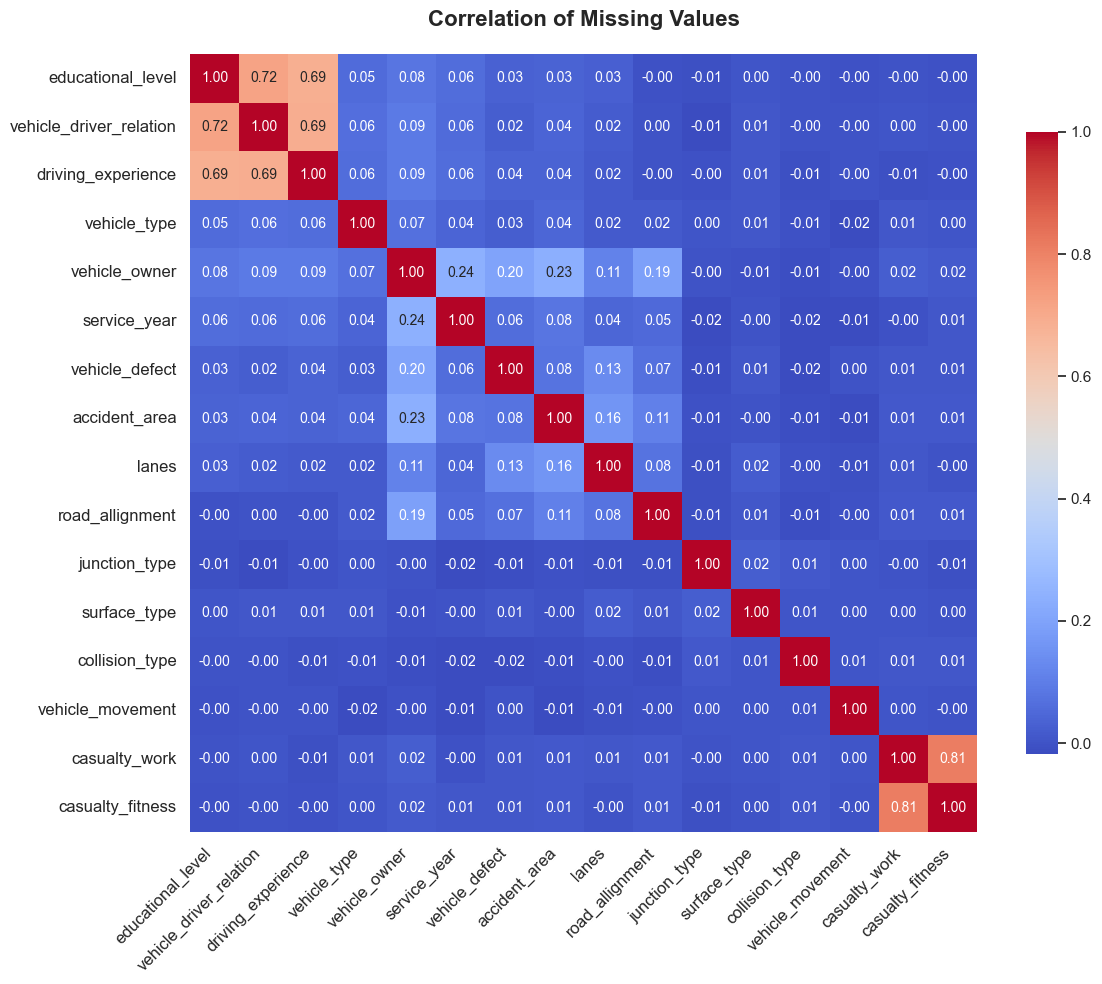

In [20]:
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<b>Duplicated Values</b>

In [21]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [22]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [23]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns)
uniques_df

time                       [17:02:00, 1:06:00, 14:15:00, 17:30:00, 17:20:...
day_of_week                [Monday, Sunday, Friday, Wednesday, Saturday, ...
driver_age                        [18-30, 31-50, Under 18, Over 51, Unknown]
driver_sex                                           [Male, Female, Unknown]
educational_level          [Above high school, Junior high school, nan, E...
vehicle_driver_relation               [Employee, Unknown, Owner, nan, Other]
driving_experience         [1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Lic...
vehicle_type               [Automobile, Public (> 45 seats), Lorry (41?10...
vehicle_owner                [Owner, Governmental, nan, Organization, Other]
service_year               [Above 10yr, 5-10yrs, nan, 1-2yr, 2-5yrs, Unkn...
vehicle_defect                                        [No defect, nan, 7, 5]
accident_area              [Residential areas, Office areas,   Recreation...
lanes                      [nan, Undivided Two way, other, Double carriag...

array([[<Axes: title={'center': 'vehicles_involved'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

<Figure size 1200x400 with 0 Axes>

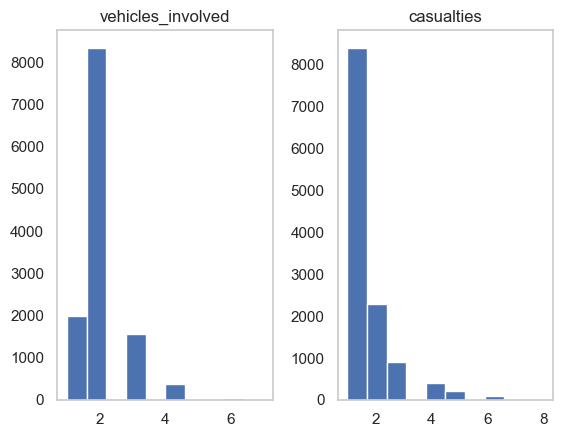

In [59]:
df.hist(grid=False)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

<b>Skewness</b>

In [25]:
count_value= df['accident_severity'].value_counts()
print(count_value)

accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [26]:
proportions = count_value / count_value.sum()
print(proportions)


accident_severity
Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: count, dtype: float64


In [27]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

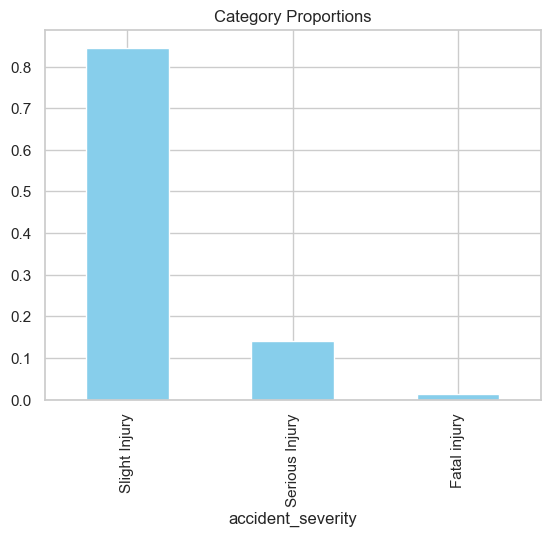

In [28]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

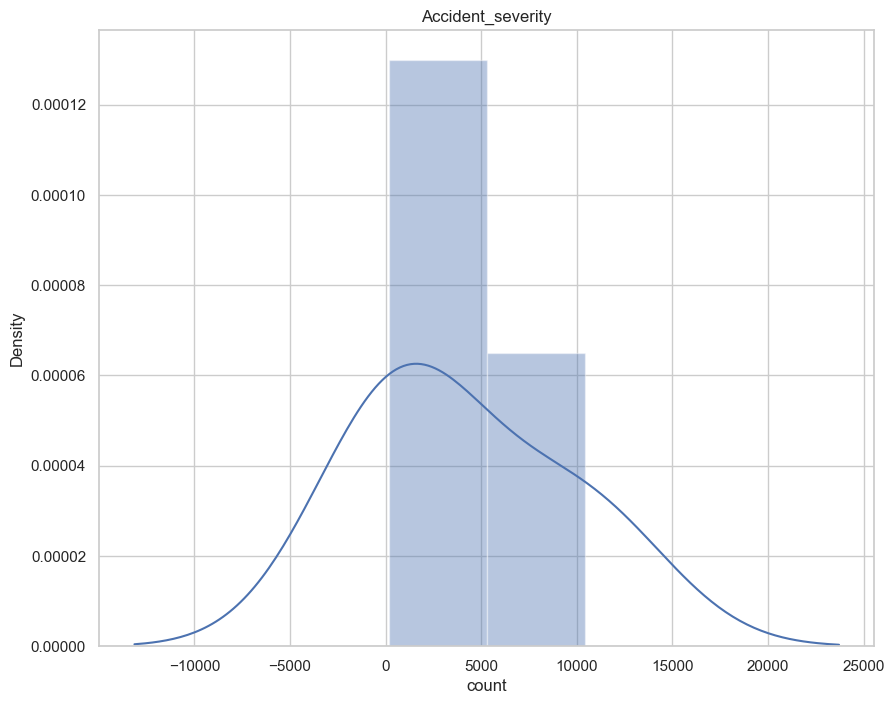

In [29]:
plt.figure(figsize= (10,8))
sns.distplot(count_value)
plt.title("Accident_severity")
plt.show()

### <i>Univariate Analysis</i>

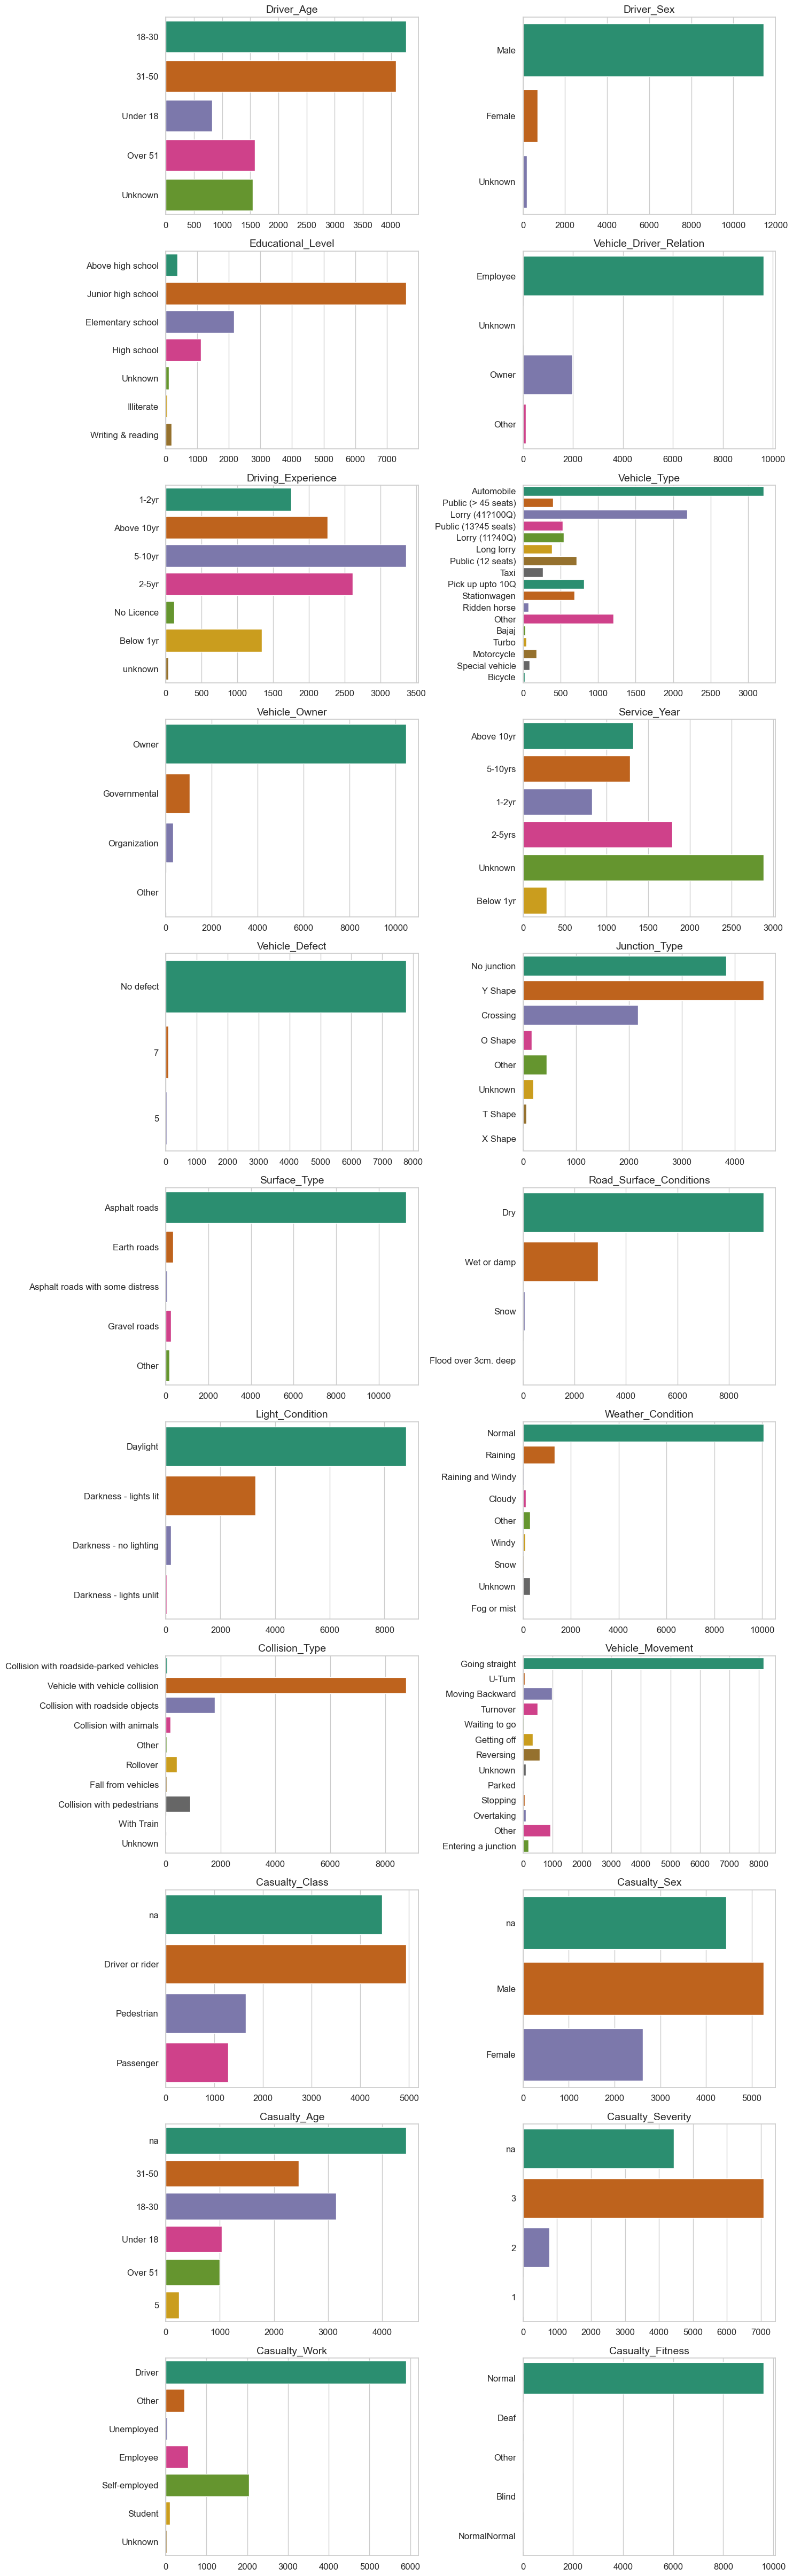

In [99]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['time', 'lanes', 'road_allignment', 'pedestrian_movement','day_of_week','accident_severity','accident_area','casualties','vehicles_involved','accident_cause'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

#### <i>Accident distribution through out the week days<i>

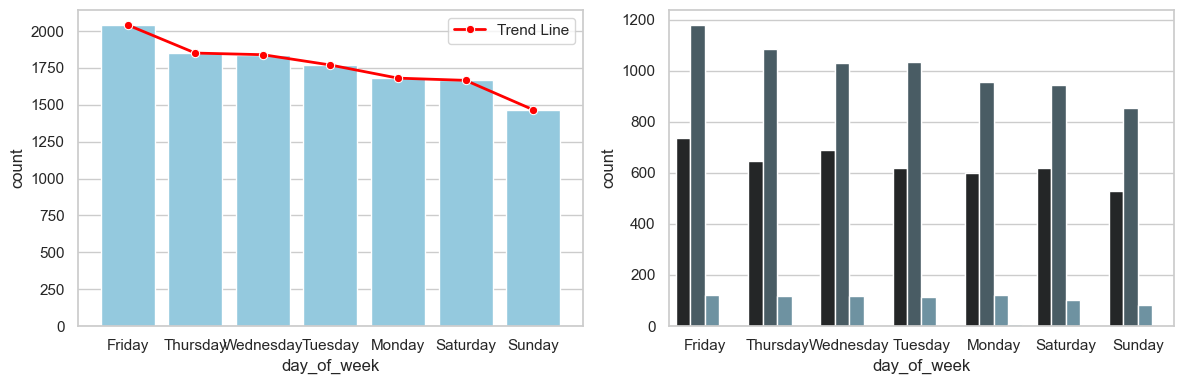

In [31]:
# Calculate value counts for accidents per day and sort them in descending order
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Sort the days based on accident count (descending order)
sorted_order = day_counts.sort_values(ascending=False).index

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Countplot ordered by accident frequency
sns.countplot(data=df, x='day_of_week', ax=axes[0], order=sorted_order, color='skyblue')

# Add trend line (optional)
sns.lineplot(x=sorted_order, y=day_counts[sorted_order], color='red', marker='o', label='Trend Line', linewidth=2, ax=axes[0])

# Second countplot with hue
sns.countplot(x='day_of_week', hue='casualty_severity', data=df, order=sorted_order, ax=axes[1], palette="viridis", legend=False)

#show the breakdown by accident severity
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=sorted_order,legend=False,ax=axes[1],color='skyblue')
# Tight layout
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Friday is the most accident prone day of all the other days for all categories of accident severity
* The accident decreases from Friday to Thursday  then Wednesday right up to Sunday in an orderly fashion
    
</div>

#### <i>Accident distribution by hour<i>

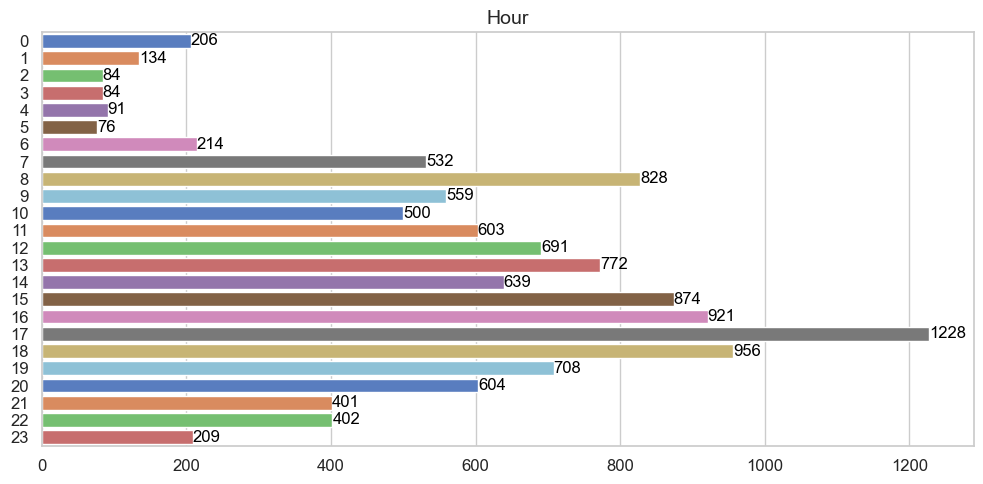

In [ ]:
plt.figure(figsize=(10,5))
# hour_counts=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour.value_counts().sort_values(ascending=False).head(8)
# order=hour_counts.index
df['hour']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour
ax=sns.countplot( data=df,y='hour',palette='muted')
# Adding annotations
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', 
            va='center', ha='left', fontsize=12, color='black')  # Display count
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
# Remove the 'hour' column after plotting
df.drop('hour', axis=1, inplace=True)
plt.tight_layout()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Most accidents happen around three critical peak hours:
* 8:00  - > Typical start  of work hour for offices,industries
* 13:00  - > Typical lunch hour
* 17:00 - > Typical Exit from work hour

Least accidents happen during the night period:
* From 23:00-5:00
    
</div>

#### Accident Area

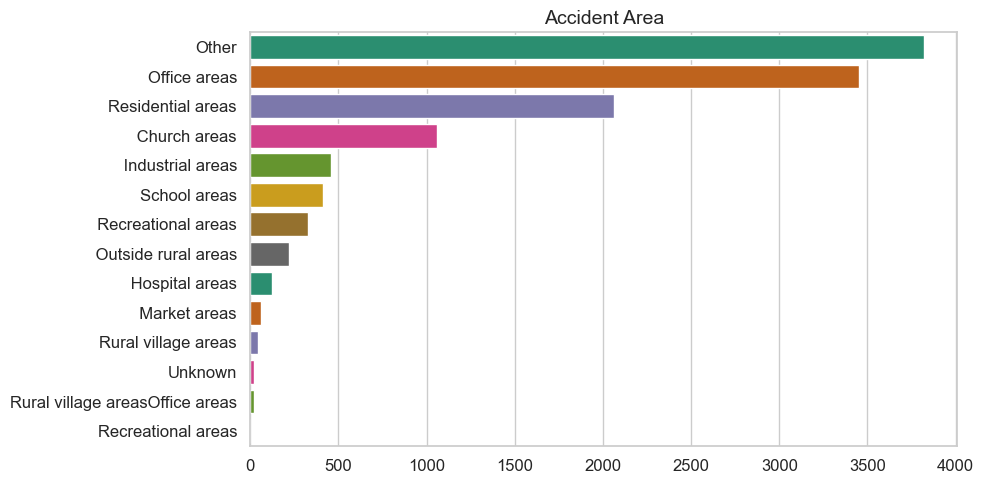

In [33]:
plt.figure(figsize=(10,5))
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident distribution through out the weekends<i>

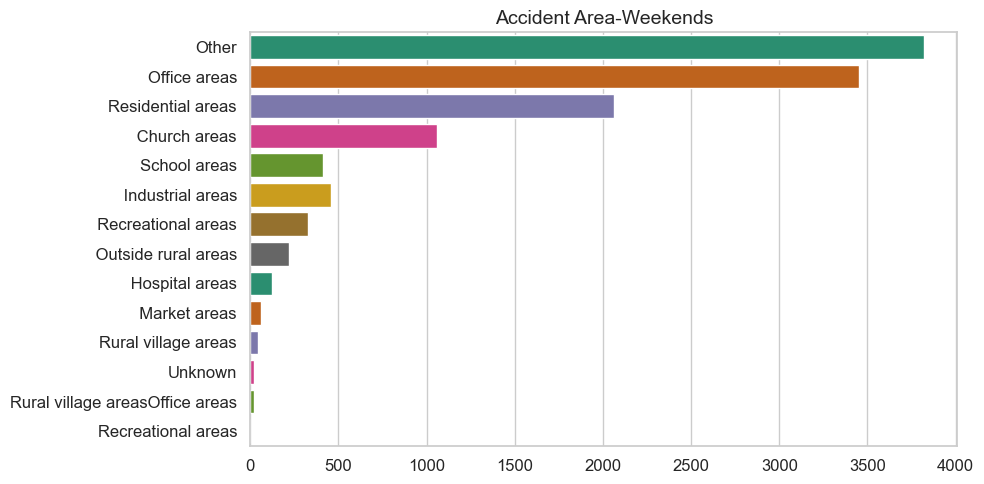

In [102]:
plt.figure(figsize=(10,5))

order=df['accident_area'].where(df['day_of_week'].isin(["Saturday","Sunday"])).value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident per Lanes<i>

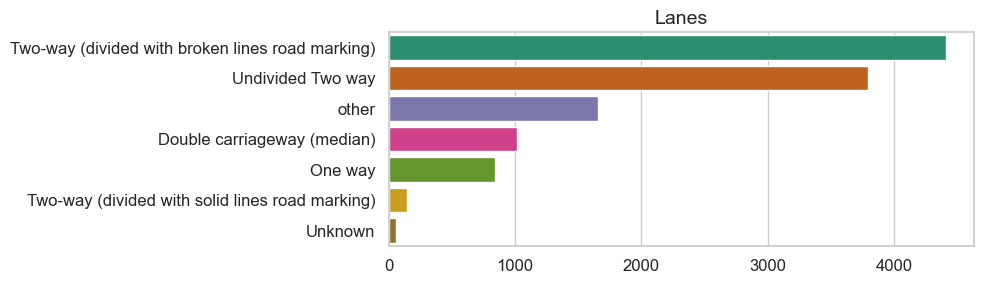

In [35]:
plt.figure(figsize=(10,3))
order=df['lanes'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Lanes where most accidents occur:
* Two-way(divided with broken lines road marking)
* Undivided Two ways 
    
</div>

#### <i>Gender Constitution of Accidents<i>

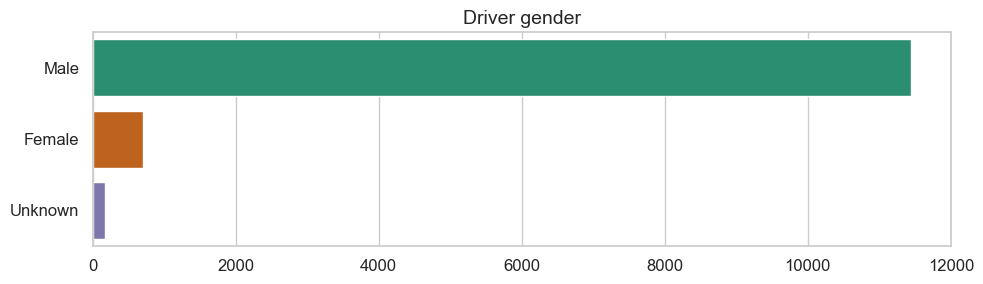

In [36]:
plt.figure(figsize=(10,3))
order=df['driver_sex'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Driver gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Depending on the prior probability of a female driver, this may show that Men are overwhelmingly prone to accident than women
    
</div>

### <i>Bivariate Analysis</i>

In [63]:
cross_tab= pd.crosstab(index=df['accident_cause'], columns=df['accident_severity'], margins=True)
pd.crosstab(index=df['accident_cause'], columns=df['accident_severity'], margins=True)
cross_tab

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


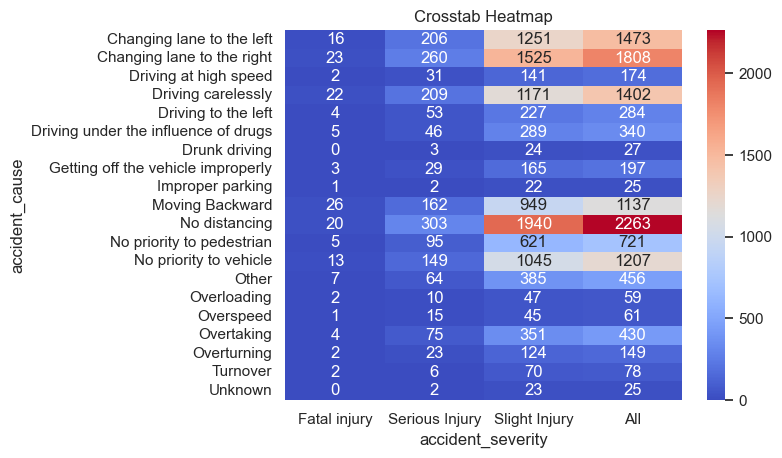

In [71]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Crosstab Heatmap')
plt.show()

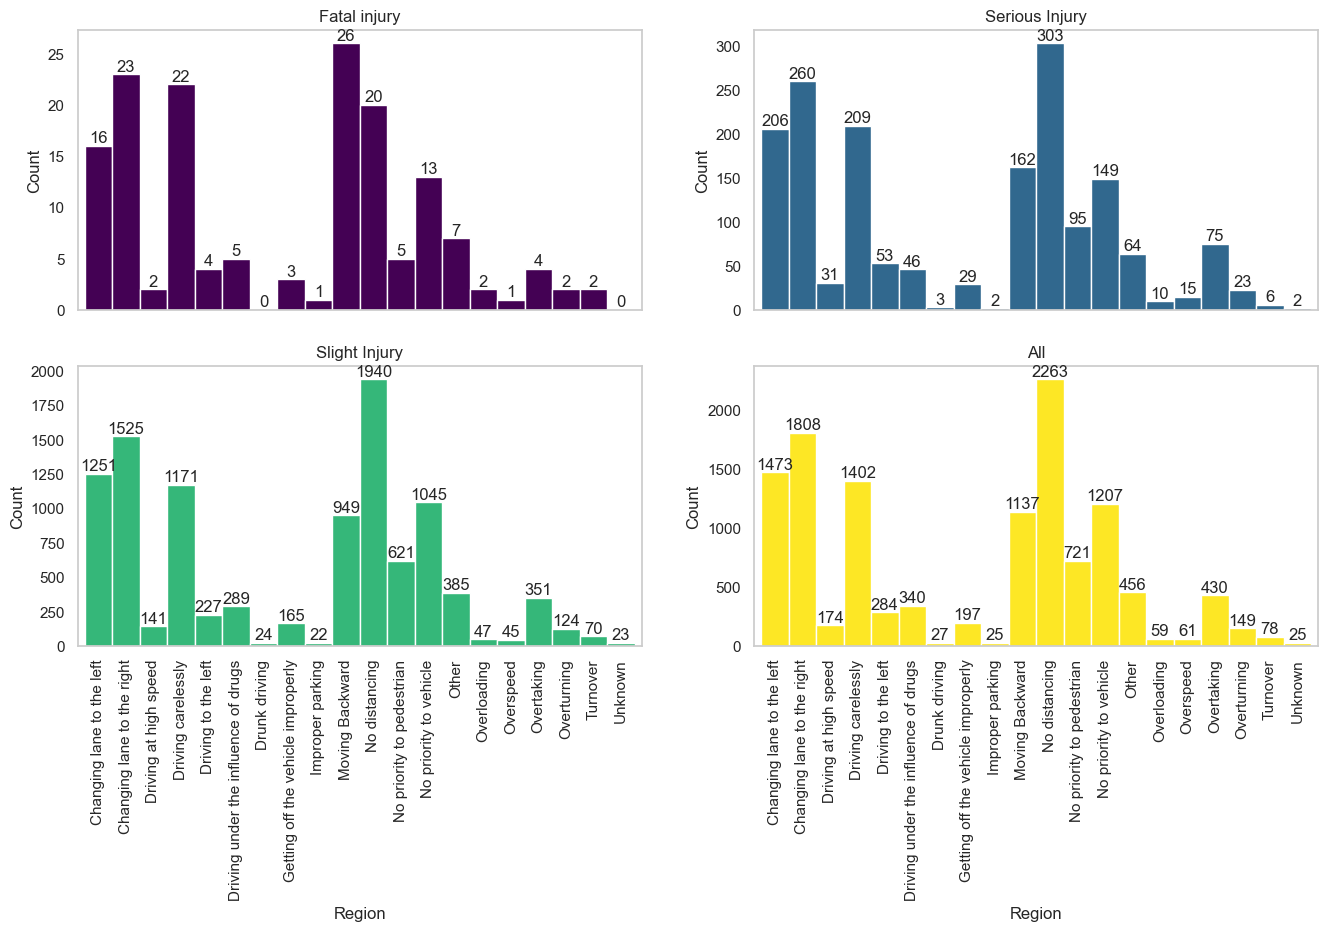

In [ ]:
#
num_columns = len(cross_tab.columns)
rows = 2  # Number of rows
cols = (num_columns + 1) // rows  # Calculate number of columns per row

# Create subplots
axes=cross_tab.plot(
    kind='bar',
    subplots=True,
    layout=(rows, cols),
    figsize=(16, 8),
    legend=False,
    colormap='viridis',
    width=1,
    grid=False
)
# Annotate each bar with its value
for ax in axes.flatten():  # Flatten the axes array to iterate over it
    for container in ax.containers:  # Iterate over bar containers
        ax.bar_label(container, fmt='%.0f')  # Add integer labels to each bar

# Add titles and labels for each subplot
for i, ax in enumerate(plt.gcf().axes):
    if i < num_columns:  # Avoid extra subplots from the grid
        ax.set_title(cross_tab.columns[i])
        ax.set_ylabel('Count')
        ax.set_xlabel('Region')  # Replace 'Region' with



<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Accident Causes:
* Changing Lanes is the most prominent cause of accidents (to the right and to the left)
* No distancing is  the second most prominent cause of accidents followed by driving carelessly and no priority to vehicles
* Improper parking,<u>Drunk driving</u>, Overloading and <u>Overspeeding</u> are the least prominent causes of Accident
    
</div>

### <i>Multivariate Analysis</i>

In [37]:

from sklearn.feature_selection import mutual_info_classif

# Encode categorical features
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Mutual information
mi = mutual_info_classif(df_encoded.drop(columns="accident_severity"), df_encoded["accident_severity"], discrete_features=True)
mi_df = pd.DataFrame({
    'Feature': df_encoded.drop(columns="accident_severity").columns,
    'Mutual Information': mi
})
print(mi_df)


                    Feature  Mutual Information
0                      time            0.134564
1               day_of_week            0.001794
2                driver_age            0.002516
3                driver_sex            0.000252
4         educational_level            0.000438
5   vehicle_driver_relation            0.000261
6        driving_experience            0.000934
7              vehicle_type            0.001986
8             vehicle_owner            0.000292
9              service_year            0.000331
10           vehicle_defect            0.000276
11            accident_area            0.001927
12                    lanes            0.000637
13          road_allignment            0.000550
14            junction_type            0.002587
15             surface_type            0.000611
16  road_surface_conditions            0.000322
17          light_condition            0.001633
18        weather_condition            0.002291
19           collision_type            0

<Figure size 1500x1000 with 0 Axes>

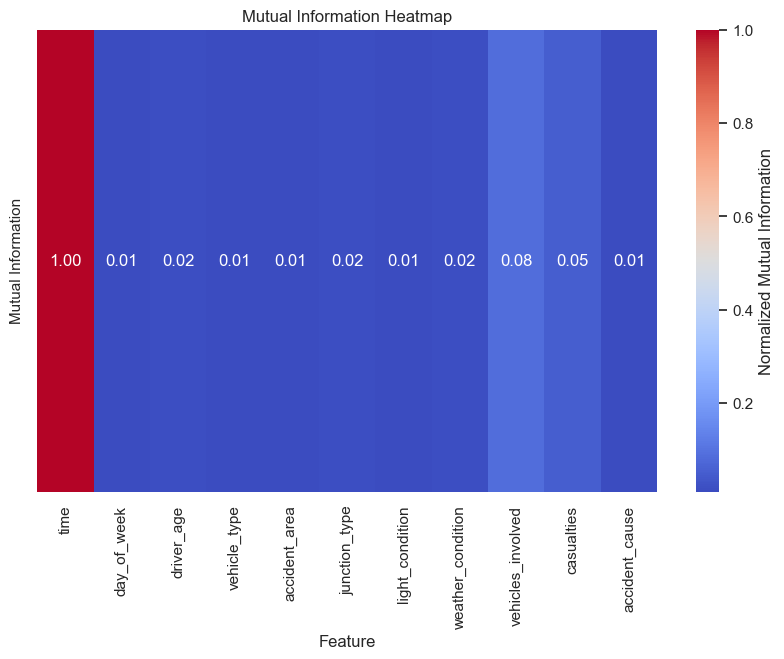

In [38]:
plt.figure(figsize=(15,10))
# sns.heatmap(mi,cmap="coolwarm")
# Plot Heatmap
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Sample MI computation (use your dataset here)
target = "accident_severity"
mi = mutual_info_classif(df_encoded.drop(columns=target), df_encoded[target], discrete_features=True)

# Normalize MI values
mi_scaled = MinMaxScaler().fit_transform(mi.reshape(-1, 1)).flatten()

# Prepare DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': df_encoded.drop(columns=target).columns,
    'Mutual Information': mi_scaled
})

# Filter out low MI features
mi_df = mi_df[mi_df['Mutual Information'] > 0.01]

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    mi_df.set_index('Feature').T,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mutual Information'}
)
plt.title("Mutual Information Heatmap")
plt.show()



# Preprocessing

### <i>Data Cleaning</i>

In [39]:
#copy data before any manipulation
df2=df.copy(deep=True)

<b>Converting values to numbers</b>

In [40]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()

#convert objects to numbers
df2['casualty_severity']=pd.to_numeric(df2['casualty_severity'],errors='coerce')

#drop the time feature
df2.drop(columns=['time'],inplace=True)
df2.dtypes

day_of_week                 object
driver_age                  object
driver_sex                  object
educational_level           object
vehicle_driver_relation     object
driving_experience          object
vehicle_type                object
vehicle_owner               object
service_year                object
vehicle_defect              object
accident_area               object
lanes                       object
road_allignment             object
junction_type               object
surface_type                object
road_surface_conditions     object
light_condition             object
weather_condition           object
collision_type              object
vehicles_involved            int64
casualties                   int64
vehicle_movement            object
casualty_class              object
casualty_sex                object
casualty_age                object
casualty_severity          float64
casualty_work               object
casualty_fitness            object
pedestrian_movement 

In [41]:
#replace unknown, Unknown and na with np.nan
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational 

**Encoding**

In [42]:
df2['hour'].dtype

dtype('int32')

In [43]:
#segreggate nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex','vehicle_driver_relation', 'vehicle_type','vehicle_owner', 'vehicle_defect', 'accident_area','lanes', 'road_allignment',
                   'junction_type', 'surface_type','road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement','casualty_class', 
                   'casualty_sex', 'casualty_fitness', 'casualty_work', 'pedestrian_movement','accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']
len(nominal_features)+len(ordinal_features)

28

In [44]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [45]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [46]:
#Create mappings and encode nominal features  in place
mappings = {}
for feature in nominal_features:
    unique_values = df2[feature].dropna().unique()
    mappings[feature] = {
        "original": {val: idx for idx, val in enumerate(unique_values)},
        "reverse": {idx: val for idx, val in enumerate(unique_values)}
    }
    df2[feature] = df2[feature].map(mappings[feature]["original"])
    df2.sample(10)


In [ ]:
#Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2[ordinal_features] = df2[ordinal_features].fillna('missing')
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)
encoded_df=df2.copy(deep=True)

encoded_df.sample(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
4895,5,1.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0,14.0,2.0,10,15
3882,6,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,2.0,...,0.0,0.0,3.0,NaN,NaN,0,12.0,2.0,9,21
1108,2,0.0,0.0,1.0,0.0,1.0,11.0,0.0,NaN,0.0,...,0.0,3.0,3.0,0.0,0.0,0,2.0,1.0,17,30
8315,5,1.0,0.0,1.0,0.0,2.0,0.0,0.0,NaN,0.0,...,0.0,1.0,3.0,4.0,0.0,3,6.0,2.0,17,30
3574,4,1.0,0.0,4.0,0.0,4.0,2.0,0.0,NaN,0.0,...,0.0,0.0,3.0,0.0,0.0,0,17.0,2.0,11,30


### Impute Missing Values

In [48]:
# imputed iteratively using Random Forest Classiffier as an estimator
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(encoded_df)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.sample(5)


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
2113,0.0,1.0,0.0,4.0,0.0,2.0,3.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,14.0,42.0
7700,6.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,2.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,8.0,2.0,16.0,16.0
7082,2.0,1.0,0.0,4.0,0.0,2.0,4.0,0.0,1.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,8.0,2.0,14.0,35.0
2947,0.0,0.0,1.0,4.0,0.0,0.0,6.0,1.0,1.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,2.0,8.0,12.0
2847,3.0,0.0,1.0,4.0,0.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,5.0,2.0,7.0,5.0


In [49]:
#decoding nominal features
for feature in nominal_features:
    reverse_map = mappings[feature]["reverse"]
    valid_values = list(reverse_map.keys())

    # Round imputed values to the nearest valid integer
    imputed_df[feature] = imputed_df[feature].apply(
        lambda x: min(valid_values, key=lambda y: abs(x - y))
    )
    # Decode back to original categories
    imputed_df[feature] = imputed_df[feature].map(reverse_map)

imputed_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
9789,Wednesday,0.0,Male,4.0,Owner,0.0,Automobile,Owner,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,2.0,19.0,31.0
9468,Wednesday,3.0,Male,4.0,Employee,3.0,Long lorry,Governmental,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,2.0,10.0,45.0
1981,Tuesday,1.0,Female,4.0,Employee,0.0,Pick up upto 10Q,Owner,1.0,No defect,...,Male,3.0,3.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,2.0,17.0,8.0
10590,Saturday,1.0,Male,4.0,Employee,0.0,Automobile,Owner,3.0,No defect,...,Male,3.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,2.0,15.0,30.0
814,Tuesday,0.0,Male,4.0,Employee,4.0,Pick up upto 10Q,Owner,0.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,No distancing,2.0,13.0,43.0
11012,Sunday,1.0,Male,4.0,Owner,3.0,Automobile,Owner,1.0,No defect,...,Male,0.0,3.0,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,2.0,9.0,32.0
5988,Monday,1.0,Male,4.0,Employee,3.0,Lorry (41?100Q),Owner,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,1.0,15.0,34.0
11462,Sunday,1.0,Male,4.0,Employee,1.0,Pick up upto 10Q,Owner,1.0,No defect,...,Male,3.0,3.0,Driver,Normal,Not a Pedestrian,No priority to vehicle,2.0,12.0,15.0
11695,Monday,1.0,Male,4.0,Owner,3.0,Lorry (41?100Q),Owner,1.0,No defect,...,Female,1.0,3.0,Driver,Normal,Not a Pedestrian,No priority to vehicle,2.0,17.0,41.0
2564,Thursday,1.0,Male,4.0,Employee,4.0,Pick up upto 10Q,Owner,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Drunk driving,2.0,14.0,39.0


In [50]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(imputed_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    imputed_df[col] = ordinal_decoded[:, i]
imputed_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
1662,Wednesday,31-50,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,5-10yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16.0,0.0
6835,Sunday,18-30,Male,Writing & reading,Employee,Below 1yr,Pick up upto 10Q,Owner,Above 10yr,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,13.0,40.0
4558,Tuesday,18-30,Male,High school,Owner,2-5yr,Public (12 seats),Owner,2-5yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Driving at high speed,Serious Injury,20.0,30.0
4816,Thursday,18-30,Female,Junior high school,Employee,5-10yr,Public (12 seats),Owner,Above 10yr,No defect,...,Male,18-30,3.0,Driver,Blind,Not a Pedestrian,Moving Backward,Slight Injury,19.0,15.0
12009,Wednesday,Under 18,Male,Junior high school,Employee,Above 10yr,Other,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,10.0,35.0
8279,Wednesday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,2-5yrs,No defect,...,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,18.0,35.0
10258,Sunday,31-50,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,No defect,...,Female,5,3.0,Driver,Normal,Not a Pedestrian,Other,Slight Injury,16.0,2.0
7100,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,2-5yrs,No defect,...,Male,Over 51,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Fatal injury,0.0,10.0
4434,Friday,18-30,Male,High school,Employee,1-2yr,Lorry (11?40Q),Owner,2-5yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,22.0,15.0
8938,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,2-5yrs,No defect,...,Male,5,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,15.0,4.0


In [ ]:
#check correct decoding
imputed_df['casualty_class'].isna().sum()
for col in imputed_df:
    print(col ," : ",imputed_df[col].unique())
imputed_decoded_df=imputed_df.copy(deep=True)

day_of_week  :  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
driver_sex  :  ['Male' 'Female']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation  :  ['Employee' 'Owner' 'Other']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
vehicle_type  :  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner  :  ['Owner' 'Governmental' 'Organization' 'Other']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicle_defect  :  ['No defect' '7' '5']
accident_area  :  ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' '

In [52]:
#save imputed_data
folder_path = "data"
file_name = "imputed_data.csv"
# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
# Full path to the CSV file
file_path = os.path.join(folder_path, file_name)

# Save DataFrame to CSV (replace if it already exists)
imputed_decoded_df.to_csv(file_path, index=False)
print(f"File saved at: {file_path}")

File saved at: data\imputed_data.csv


### <i>Data Transformation</i>

### <i>Data Reduction</i>

# Insights and Recommendations